In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('../datasets/diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.shape

(768, 9)

In [5]:
df_diab.Outcome.unique()

array([1, 0], dtype=int64)

In [6]:
# Check if any zero or missing values. 
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Baking the data set to extract dependent and independent variables. 
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab['Outcome']

In [8]:
# A seed is a number that initializes the selection of numbers by a random number generator; 
# given the same seed number, a random number generator will generate the same series of 
# random numbers each time a simulation is run.
np.random.seed(12345)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split into training and testing, to perform stratified sammpling
# Stratified sampling: dividing the whole data set into homogeneous groups called strata (stratum).

# train_size is 80% // 80% of the data is used to train the model. Large data is required for the training.
# random_state is 12345 // 
# stratify = y // to get a balanced data for the training. Can only be done on the dependent data (not on independent data).
# the stratify sampling will ensure that the percentage of the split data is also same as the original data. 
# Random sampling may create certain imbalances in the training and test data and may lead to inaccuracies. 
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [11]:
X_train.shape

(614, 8)

In [12]:
X_test.shape

(154, 8)

In [13]:
# Scale of certain data columns are different than each other. To unify the scale, standard scaling is performed.
# Other scaler types are: Min-Max scaler, Robust scaler. 
from sklearn.preprocessing import StandardScaler

In [14]:
# X-scaled = (X - mean)/sd -> z value

# Neural network are sensitive to scale so scaling is mandtory. 
# Some ML algorithms also needs scaling 

# (x-mu)/sigma
# Calculate Z values for each column divided by standard deviation. 

# Training dataset is used for training the model. So 'mu' and 'sigma' is inferred from the training set only.
# Test dataset is used for validating the model. We keep the test set prstine. Don't learn or infer anything.

# Do fit_transform only on X_train and transform on X_test.
# We take the mean and standard deviation from X_train and apply it to X_test.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
print(tf.__version__)

2.18.0


In [17]:
# In TF, models are build using 'Seqiential' APIs and 'Functional' APIs. 
# In 'sequential' APIs, we are building one layer (input, hidden-1, hidden-2, etc.) after the other. 
from tensorflow.keras.models import Sequential

In [18]:
# Every layer can be modeled as a 'Dense' layer. 
# The 'Dense' layer a.k.a. fully connected layer i.e. every neuron is connected to previous layer and following layer.
# The 'Input' Layer 
from tensorflow.keras.layers import Dense, Input

In [19]:
# Instantiate a blank model. No layers are added as yet. 
model = Sequential()

In [20]:
# We are having 8 input features. 
X_train_scaled.shape[1]

8

In [21]:
# Add the all input features to the input layer. 
# Layer has a 'shape' argument, where we initialie it with a 2-D array. 
model.add(Input(shape = (X_train_scaled.shape[1],))) # Input Layer

In [22]:
# First Hidden Layer - with 128 neurons, and activation function 'Relu'
# The number of first hidden layers can be anything. They will keep reducing more layers are added.
model.add(Dense(units=128,
                activation='relu'
         ))

In [23]:
# Add two more hidden layer to make it a Deep neural network (DNN)
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

# Third Hidden Layer 32, relu activation
model.add(Dense(units=32, activation='relu'))

In [24]:
# Output layer - Sigmoid. 
# WE have addd only one neuron and using 'sigmoid' activation function 
# in the output layer as it is a binary classification.
model.add(Dense(units=1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#(8+1)*128 = 1152
#(128+1)*64 = 8256
#(64+1)*32 = 3080
#(1+1)*1 = 2

In [27]:
# Note that in the first hidden (dense) layer, there are 128 neurons i.e. 128 * 8+1 input neurons.
# Therfore 128 * 9 = 1152 parameters (or links)

# Note that in the second hidden (dense) layer, there are 64 neurons i.e. 64 * 128+1 input neurons.
# Therfore 64 * 129 = 8256 parameters (or links)

# Note that in the third hidden (dense) layer, there are 32 neurons i.e. 32 * 64+1 input neurons.
# Therfore 32 * 65 = 2080 parameters (or links)

# Note that in the final output (dense) layer, there is 1 neurons i.e. 1 * 1+1 input neurons.
# Therfore 1 * 2 = 2 parameters (or links)

# Trainable parameters: the one which are able to optimize using the gradient descent algorithm.
1152+8256+2080+33+2

11523

In [28]:
# Compile the configured model. 
# "adam" optimizer is used, which is the advanced version of gradeint descent. 
# Use the binary cross entropy log loss function.
# Metric to be monitored for is 'accuracy'.
model.compile(optimizer='adam', # Variant of Gradient Descent
              loss= 'binary_crossentropy', # Log Loss or Binary Cross Entropy
              metrics=['accuracy']) # Monitor Accuracy

In [29]:
# The function 'fit' trains the model where the model learns patterns from the provided data.
# X and Y: the input data and the corresponding target labels.
# validation_data: used to monitor model's performance during training, helping to detect overfitting.
# epochs: the number of times the model will iterate over the entire training dataset. 
#  - Nunber of epochs is not fixed. Sometimes accuracy is achieved with a smaller value as well.
# Performs:
# - Feeding data to the model.
# - Calculating the error (loss).
# - Adjusting the model's parameters to reduce the error.
# - Repeating this process for a specified number of times.
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

# Interpreting output:
# Epoch 88/100
# 20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.4383 - val_accuracy: 0.7597 - val_loss: 0.5397
# - accuracy: on the training data set. 
# - loss: loss on the training data set. 
# - val_accuracy: on the validation data set. 
# - val_loss: loss on the validation data set. 

# The large difference beween the training accuracy and the validation accuracy is the indicator of overfitting. 
# Accuracy depends on number of layers. 
# With CNN, we can not train for a larger number of epochs (e.g. 50+). We need a higher compute (GPU/TPU) machine.
# Auto encoders are trained using 500+ epochs e.g. complex data (e.g. music). 

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5787 - loss: 0.6585 - val_accuracy: 0.7532 - val_loss: 0.5277
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7555 - loss: 0.5189 - val_accuracy: 0.7792 - val_loss: 0.4574
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7773 - loss: 0.4642 - val_accuracy: 0.7857 - val_loss: 0.4389
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7851 - loss: 0.4560 - val_accuracy: 0.7857 - val_loss: 0.4388
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8027 - loss: 0.4242 - val_accuracy: 0.7727 - val_loss: 0.4340
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7902 - loss: 0.4429 - val_accuracy: 0.7792 - val_loss: 0.4284
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7905 - loss: 0.4227 - val_accuracy: 0.7792 - val_loss: 0.4292
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7958 - loss: 0.4230 - val_accuracy: 0.7727 - 

In [30]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [31]:
y_train_pred[0] >=0.5

array([ True])

In [32]:
# Import the confusion matrix and ccuracy score to determine the loss (correlating it to the model)
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[397,   3],
       [  2, 212]], dtype=int64)

In [34]:
# Verify the accuracy on the training data set. 
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

0.99185667752443

In [35]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[76, 24],
       [20, 34]], dtype=int64)

In [36]:
# Verify the accuracy on the test data set. 
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.7142857142857143

In [37]:
# The record of the training process, specifically the metrics that were tracked during each epoch. 
# These are the same numbers which are displayed during the training of the model at each epoch.
history = pd.DataFrame(result.history)

In [38]:
history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.672638,0.617253,0.753247,0.527719
1,0.754072,0.510039,0.779221,0.457389
2,0.776873,0.469774,0.785714,0.438939
3,0.786645,0.454751,0.785714,0.438811
4,0.788274,0.443680,0.772727,0.434036


In [39]:
import matplotlib.pyplot as plt

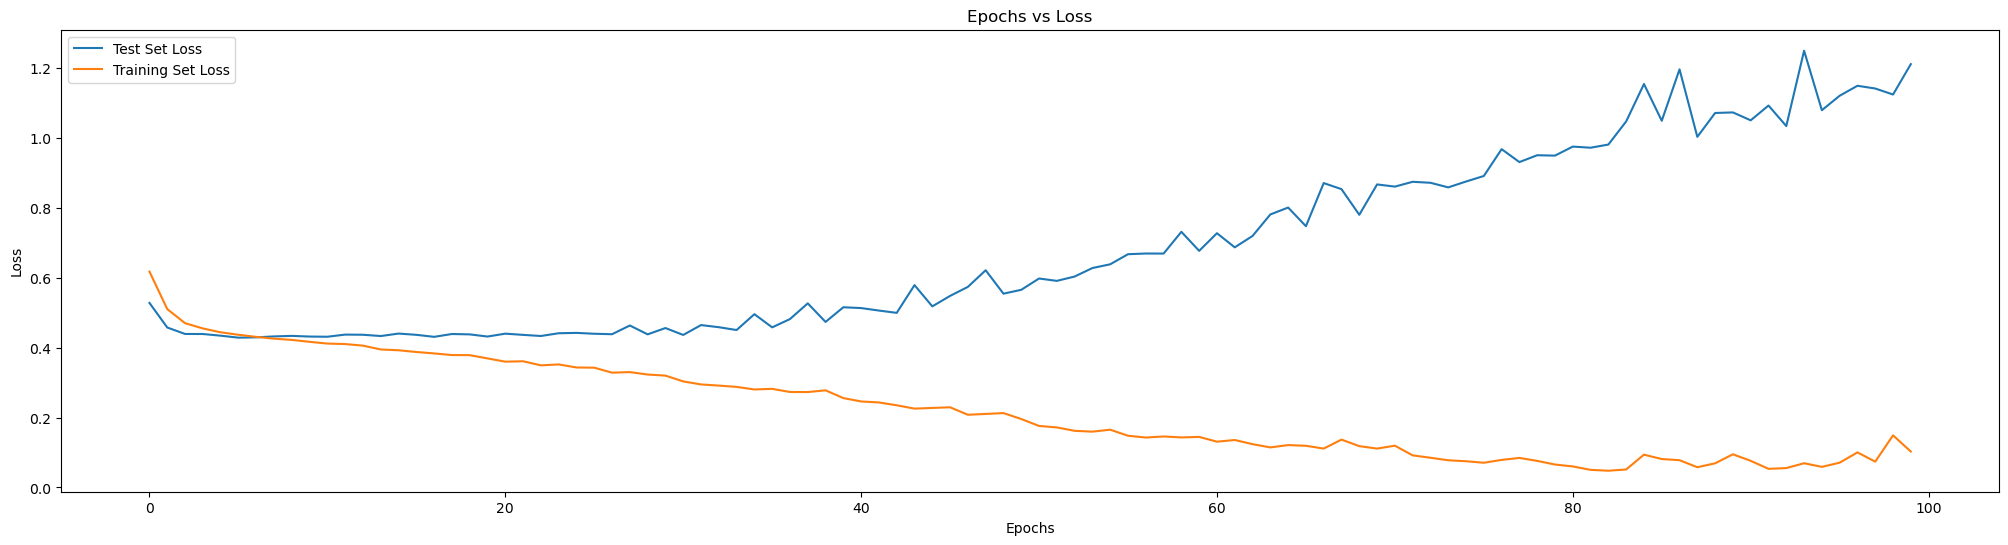

In [40]:
# Plot the graph of the history to visualize the difference between the training loss and the testing loss. 
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

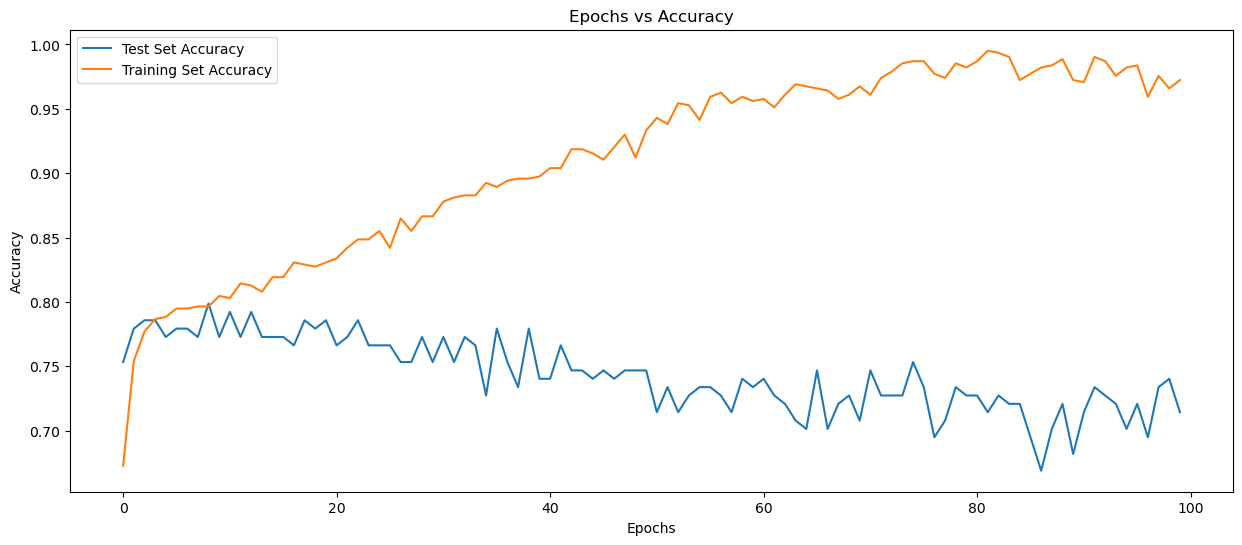

In [41]:
# Plot the graph of the history to visualize the difference between the training accuracy and the testing accuracy. 
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
# Display the model weights layer by layer. 
model.get_weights()

[array([[-0.26959774,  0.10946758,  0.2249993 , ..., -0.13737191,
         -0.23306139,  0.06360957],
        [ 0.20160116,  0.20237659,  0.25787732, ..., -0.37392697,
          0.18326157, -0.14942007],
        [-0.09486642, -0.13795713, -0.15986449, ...,  0.02432849,
         -0.25631186,  0.37877968],
        ...,
        [ 0.14612304,  0.16217372,  0.05625659, ..., -0.11084835,
         -0.06725694, -0.14837605],
        [-0.20047328,  0.23017947,  0.01638706, ...,  0.11020467,
          0.218328  ,  0.25103238],
        [-0.02310985, -0.01546471, -0.21083649, ..., -0.19872485,
          0.11873502,  0.1385103 ]], dtype=float32),
 array([ 0.03544249, -0.02486247, -0.01495735, -0.07769862,  0.05048937,
        -0.08253377, -0.03378524, -0.06102377, -0.05119123, -0.00539534,
        -0.00051568,  0.01673323, -0.00921883,  0.02797197, -0.03706643,
         0.06534898,  0.05942265, -0.07828026, -0.02021494,  0.02840703,
        -0.0466579 , -0.14291233,  0.07050908,  0.01934274,  0.025

In [43]:
# Model accuracy depends on:
# - the number of layers in the model.
# - the neurons in each of the layer. 
# - Process is called experimentation. 
# - With experience, the number of layers and neurons in each layer 
# - Hyperparameter tuning using random search to find optimal neurons and activation functions. 
#   - keras.tuner library for this purpose. Use this as only as a reference. 
# - Grid search 
# With optimal values we are trying to impact the accuracy of the model. 
# With regulerization, we are making sure that the overfitting does not happen. 
# - Regulirization adds an additional term to the loss function (sum of square of the weights)
# - It puts constrains on the parameters at each layer by adding the sum of square of the weights.
# - This ensures that the weights do not go very high. 

# Implement Early Stopping

In [45]:
# Early stopping is the point at which there is no improvement in the accuracy of the model. The model starts overfitting.
# A call back function check for this condition and stops the model training.
# Learned hypothesis may fit the training data and the outliers (noise) very well but fail to generalize the test data.
# A check to see if the validation loss is not improving, do not train any further and stop the training. 
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
model_es = Sequential()

In [47]:
model_es.add(Input(shape = (X_train_scaled.shape[1],)))

In [48]:
model_es.add(Dense(units = 128, activation='relu'))

In [49]:
model_es.add(Dense(units = 64, activation = 'relu'))

In [50]:
model_es.add(Dense(units = 32, activation = 'relu'))

In [51]:
model_es.add(Dense(units = 1, activation = 'sigmoid'))

In [52]:
model_es.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_es.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['Accuracy'])

In [54]:
# Callbacks are used to implement early stopping programatically by injecting a custom code into tensor flow execution.
# Assuming 'es' is your EarlyStopping callback. 

# Early stopping criteria: 
# - Monitor the training accuracy of the model.
# - Check for the number of epochs given in the petience. Stop the model if desired results are not improving further.
es = EarlyStopping(
    monitor='val_Accuracy', 
    mode='max', 
    patience=5, 
    restore_best_weights=True
) # adjust patience as needed.

In [55]:
# Make sure that the model fitting is done on a blank model. If you run the fit model multiple time,
# it is going to use the weights from the last step and start again from there, which is not correct. 
# On a blank model, it uses the weights initialized using the xavier's distribution. 
# Logically, running fit method multiple times if like running those many epochs. 
result_es = model_es.fit(X_train_scaled,
                         y_train,
                         validation_data = (X_test_scaled, y_test),
                         epochs = 100,
                         callbacks=[es]
                        )

# Using ES is a double edge sword.
# - If you get less number of patience, it may not give correct results. 
# - For complex model, the learning starts quite late. So chosing a correct value is very important.

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - Accuracy: 0.6512 - loss: 0.6520 - val_Accuracy: 0.7597 - val_loss: 0.5440
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.7421 - loss: 0.5403 - val_Accuracy: 0.7922 - val_loss: 0.4714
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.8007 - loss: 0.4501 - val_Accuracy: 0.7792 - val_loss: 0.4474
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Accuracy: 0.7773 - loss: 0.4550 - val_Accuracy: 0.7922 - val_loss: 0.4356
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.7921 - loss: 0.4223 - val_Accuracy: 0.7922 - val_loss: 0.4282
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.8172 - loss: 0.4043 - val_Accuracy: 0.7857 - val_loss: 0.4321
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.7953 - loss: 0.4226 - val_Accuracy: 0.7792 - val_loss: 0.4272


In [56]:
history_es = pd.DataFrame(result_es.history)

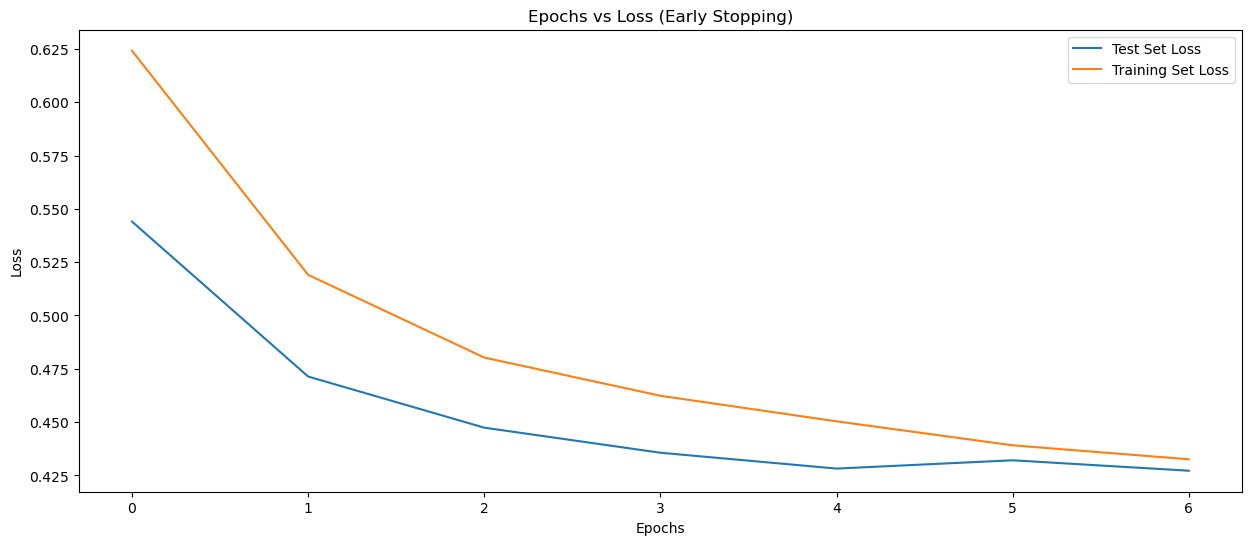

In [57]:
plt.figure(figsize = (15,6))
plt.plot(history_es.val_loss, label='Test Set Loss')
plt.plot(history_es.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Implementing L1 Regularization

In [59]:
model_reg = Sequential()

In [60]:
model_reg.add(Input(shape = (X_train_scaled.shape[1],)))

In [61]:
# First Hidden Layer - 128 neurons, Relu activation, L1 Regularizer for the Kernel.
# The reguerization happens at the kernel i.e. at the first hidden layer level.
# No regulrization is applied at the subsequent laeyrs. 

# L1 is callled Lasso regulerization
# L2 is called Ridge regulerization.
# L1 and L2 combined is called ElasticNet regulerization. 
# Typically, L1 with early stopping or dropout is recommended approach.
model_reg.add(Dense(units=128,
                    activation='relu',
                    # kernel_regularizer = tf.keras.regularizers.L2()
                    kernel_regularizer = tf.keras.regularizers.L1()
                   )
             )

In [62]:
# Second Hidden Layer - 64 neurons, Relu activation
# No regulrization is applied at the subsequent laeyrs. 
model_reg.add(Dense(units=64, activation='relu'))

In [63]:
# Third Hidden Layer 32, relu
model_reg.add(Dense(units=32, activation='relu'))

In [64]:
# Output layer - Sigmoid
model_reg.add(Dense(units=1, activation='sigmoid'))

In [65]:
model_reg.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [66]:
model_reg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
result_reg = model_reg.fit(X_train_scaled, 
                           y_train,
                           validation_data = (X_test_scaled, y_test),
                           epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7295 - loss: 1.6664 - val_accuracy: 0.7727 - val_loss: 1.4401
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7652 - loss: 1.3994 - val_accuracy: 0.7987 - val_loss: 1.2340
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7825 - loss: 1.2135 - val_accuracy: 0.7987 - val_loss: 1.0927
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7784 - loss: 1.0942 - val_accuracy: 0.7987 - val_loss: 0.9786
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7862 - loss: 0.9714 - val_accuracy: 0.7922 - val_loss: 0.8803
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7940 - loss: 0.8709 - val_accuracy: 0.8117 - val_loss: 0.7901
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7834 - loss: 0.7926 - val_accuracy: 0.7987 - val_loss: 0.7305
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8094 - loss: 0.7235 - val_accuracy: 0.7922 - 

In [68]:
history_reg = pd.DataFrame(result_reg.history)

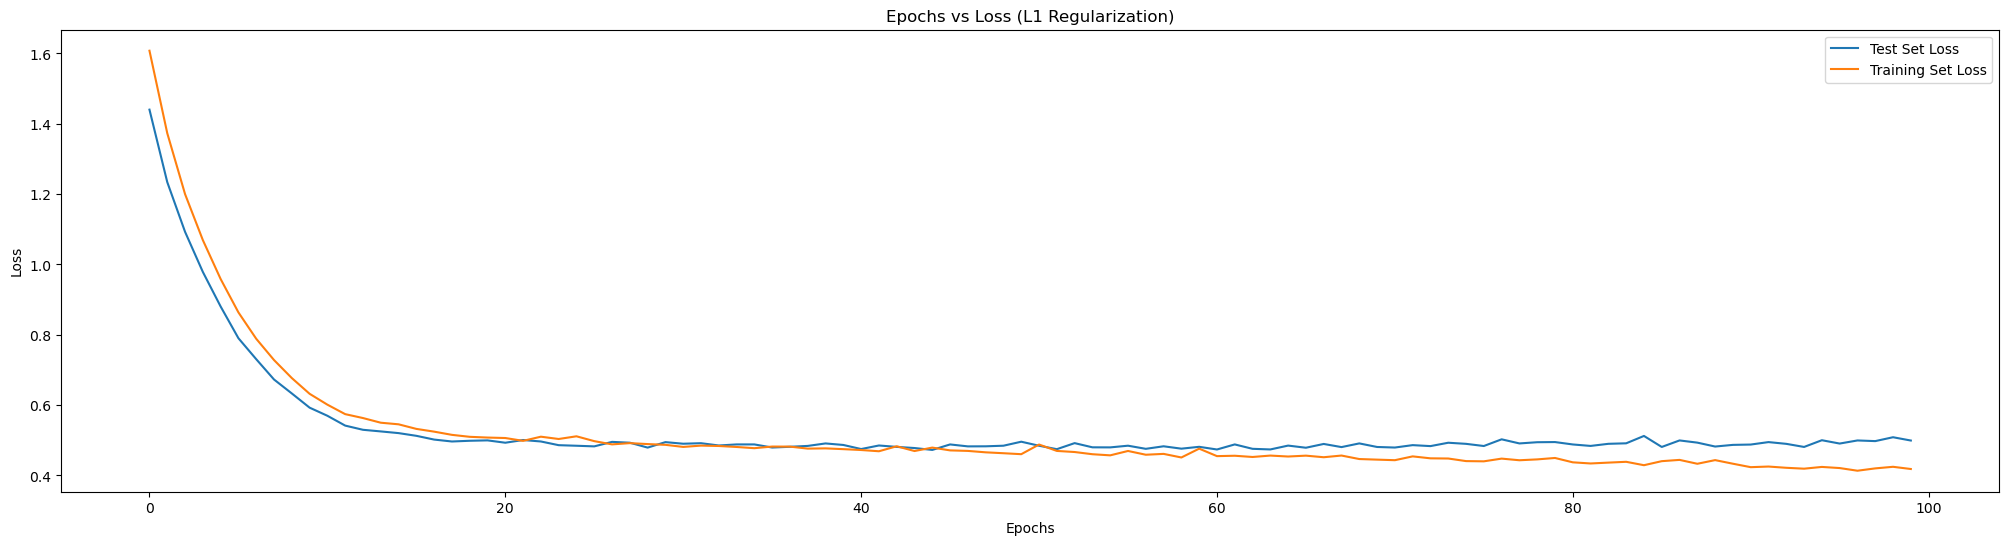

In [69]:
plt.figure(figsize = (25,6))
plt.plot(history_reg.val_loss, label='Test Set Loss')
plt.plot(history_reg.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (L1 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
# Summary
# - When a model is deployed in production, we have to monitor for the accuracy of the model.
# - We check for if the distribution of the data changing. 
# - For example, we are sending "Propensity to buy a product" in a marketing campaign refers to:
#   - the predicted likelihood that a specific customer will purchase a particular product, 
#     based on their past behavior, demographics, and other relevant data.
#     buying power of customer (e.g. having more money), the model data is changing.
# - It is recommended that we update model eveyr 3-6 months for changing data. 
#   - the model wights needs to be updated and model needs to be retrained to improve the accuracy.

# The real test of a mode is how it performs on an unseen data. 
# It is not import that the loss lines intersect each other on the plot as long as their trend remain constant.

# Implement Dropout Regularization

In [100]:
from tensorflow.keras.layers import Dropout

In [102]:
model_drp = Sequential()

In [104]:
model_drp.add(Input(shape = (X_train_scaled.shape[1],)))

In [106]:
model_drp.add(Dense(units=128, activation='relu'))

In [108]:
model_drp.add(Dropout(0.5))

In [110]:
model_drp.add(Dense(units=64, activation='relu'))

In [112]:
model_drp.add(Dropout(0.3))

In [114]:
model_drp.add(Dense(units=32, activation='relu'))

In [116]:
model_drp.add(Dropout(0.25))

In [118]:
model_drp.add(Dense(units=1, activation='sigmoid'))

In [120]:
model_drp.summary()

# We have added a dropout layer for each layer (except the output layer)
# Dropout layer has no parameters as they are not learning anything in there.
# We can not have dtopout layer at the input layer as it would drop the input features itself.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model_drp.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [124]:
result_drp = model_drp.fit(X_train_scaled, 
                           y_train,
                           validation_data = (X_test_scaled, y_test),
                           epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5382 - loss: 0.6959 - val_accuracy: 0.7532 - val_loss: 0.5975
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6866 - loss: 0.6023 - val_accuracy: 0.7597 - val_loss: 0.5393
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7006 - loss: 0.5589 - val_accuracy: 0.7597 - val_loss: 0.4979
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7270 - loss: 0.5376 - val_accuracy: 0.7727 - val_loss: 0.4698
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7534 - loss: 0.5187 - val_accuracy: 0.7532 - val_loss: 0.4556
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7781 - loss: 0.5162 - val_accuracy: 0.7792 - val_loss: 0.4478
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7647 - loss: 0.4942 - val_accuracy: 0.7857 - val_loss: 0.4374
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7645 - loss: 0.5056 - val_accuracy: 0.7857 -

In [128]:
history_drp = pd.DataFrame(result_drp.history)

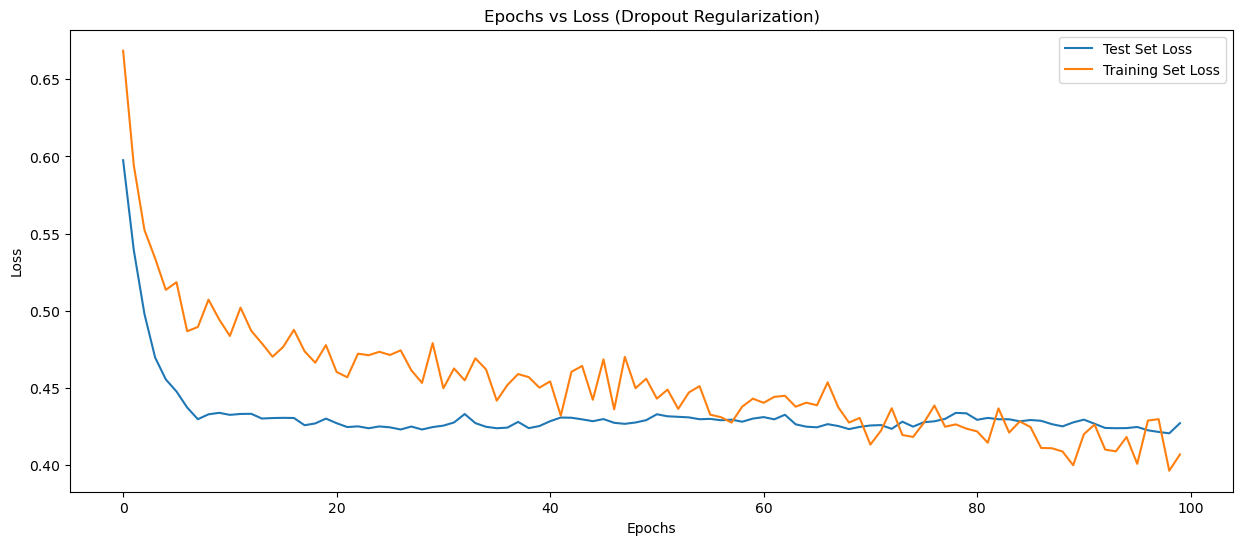

In [130]:
plt.figure(figsize = (15,6))
plt.plot(history_drp.val_loss, label='Test Set Loss')
plt.plot(history_drp.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (Dropout Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [132]:
# Summary
# - In real world, overfitting is the biggest problem we have to deal with. 
# - May be the data distribution between training and test set is not good. 
# - The way to tackle this is through experimentation.
# - Whether to combine L1, L2, early stopping, dropout, etc all depenends on experimentation.

